<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Cat or Dog - V1 - Simple
</div>

<div style="display: flex; background-color: blue;" >

# 1.Contexte du projet
</div>

Dans ce projet, vous apprendrez les bases des CNN, leur structure, leurs composants et leur fonctionnement, et vous apprendrez pratiquement comment résoudre une tâche d'apprentissage en profondeur de classification d'images, former , et testez un réseau de neurones avec Tensorflow à l'aide d'images.

- Mettez en place un système de veille
- Import the Dataset and Preprocess the Data
- Create and Train the Model
- Test the Model and Make Predictions

### Jalon

Date limite 07/08/2022

### Critères de performance

À la fin de ce projet, vous aurez créé un réseau de neurones profonds avec TensorFlow sur un ensemble de données.

### Livrables

Une présentation type "Powerpoint", faisant office de veille.

Quelques questions de veille 
- C'est quoi le Deep Learning 
- Présenter la librairie Tensorflow ...
- Qu'est-ce qu'un CNN (l'avantage, l'inconvénient, domaine d'application), est-ce qu'il y a d'algorithmes plus puissants que CNN 
- Décrire notamment comment construire un CNN et l'utilité de chaque étape 
(sinon vous pouvez représenter d'autres axes qui vous sembler intéressant à savoir avant de commencer un projet sur le Deep Learning)


Jupyter Notebooks : classification

### Ressources
- train set : https://drive.google.com/drive/folders/1LLBvdZH07dtugxxHDvqArGp9lR7pQZgP?usp=sharing
- validation set : https://drive.google.com/drive/folders/1IoUkz-y_42xv_GzmHTMfb0hdVk-rrWWK?usp=sharing
- cats-train : https://drive.google.com/drive/folders/1xODwWAdtDLPVftnG8wM41sTQxgAbg81G?usp=sharing
- Your First Deep Learning with Keras Step-By-Step : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 
- Mettez en place un système de veille : https://openclassrooms.com/fr/courses/4805776-mettez-en-place-un-systeme-de-veille-informationnelle

In [37]:
import matplotlib.pyplot as plt

from cat_or_dog_aurelie import *

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from os import getcwd

import cv2

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = 1

# Récupère le répertoire du programme
file_path = getcwd() + "\\"

print(f"Current execution path : {file_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\


In [3]:
source_data_path = join(file_path,"dataset")
training_data_path = join(source_data_path, "training_set")
validation_data_path = join(source_data_path, "validation_set")
print("Source path :", source_data_path)
print("Training path :", training_data_path)
print("validation path :", validation_data_path)

Source path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset
Training path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\training_set
validation path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\validation_set


In [8]:
# target_size=(64,64) # la taille de la plus petite image
target_size=(50,50) # la taille de la plus petite image
batch_size = 32
class_mode='binary'
rescale=1./255 # standardisation des données des images

<div style="display: flex; background-color: blue;" >

# 3.Modèle pré-entrainés
</div>

https://keras.io/api/applications/#usage-examples-for-image-classification-models

In [21]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.1. ResNet50
</div>

<div style="display: flex; background-color: indigo;" >

#### 3.1.1. Modèle
</div>

In [22]:
from tensorflow.keras.applications import resnet50

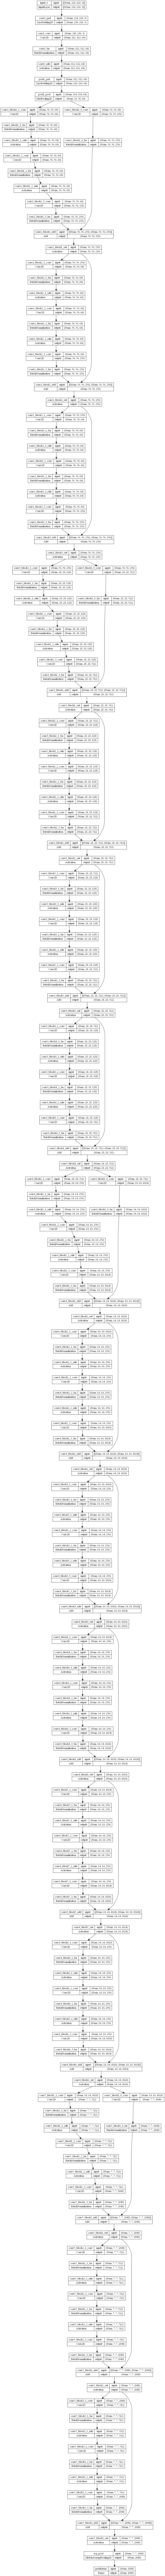

In [23]:
model_resnet50_1 = resnet50.ResNet50(weights='imagenet')
tf.keras.utils.plot_model(model_resnet50_1, show_shapes=True)

<div style="display: flex; background-color: indigo;" >

#### 3.1.2. Prediction une image
</div>

In [24]:
img = image.load_img(img_test, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = resnet50.preprocess_input(x)

preds = model_resnet50_1.predict(x)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', resnet50.decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 803ms/step
Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]


<div style="display: flex; background-color: indigo;" >

#### 3.1.3. Prediction quelques images
</div>

In [25]:
success = 0
fail = 0
fail_files = []
fail_predictions = []
predictions = []

aurelie_test, aurelie_y = get_aurelie_test()

for i in range(0, len(aurelie_test)):
    try:

        img = image.load_img(img_test, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = resnet50.preprocess_input(x)

        preds = model_resnet50_1.predict(x)
        # decode the results into a list of tuples (class, description, probability)
        # (one such list for each sample in the batch)

        preds =  resnet50.decode_predictions(preds, top=3)[0]


        print('Predicted:',preds)
        
        # predictions.append(predict_class)
        
        # if found:
        #     success += 1
        # else:
        #     fail += 1
        #     fail_files.append(aurelie_test[i])
    except Exception as e:
        print(i, aurelie_test[i], e)
        predictions.append(-1)

1/1 [==============================] - 0s 109ms/step
Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]
1/1 [==============================] - 0s 112ms/step
Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]
1/1 [==============================] - 0s 115ms/step
Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]
1/1 [==============================] - 0s 108ms/step
Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]
1/1 [==============================] - 0s 128ms/step
Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]
1/1 [===============

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.2. VGG16
</div>

In [26]:
from tensorflow.keras.applications import vgg16

58889256/58889256 [==============================] - 5s 0us/step


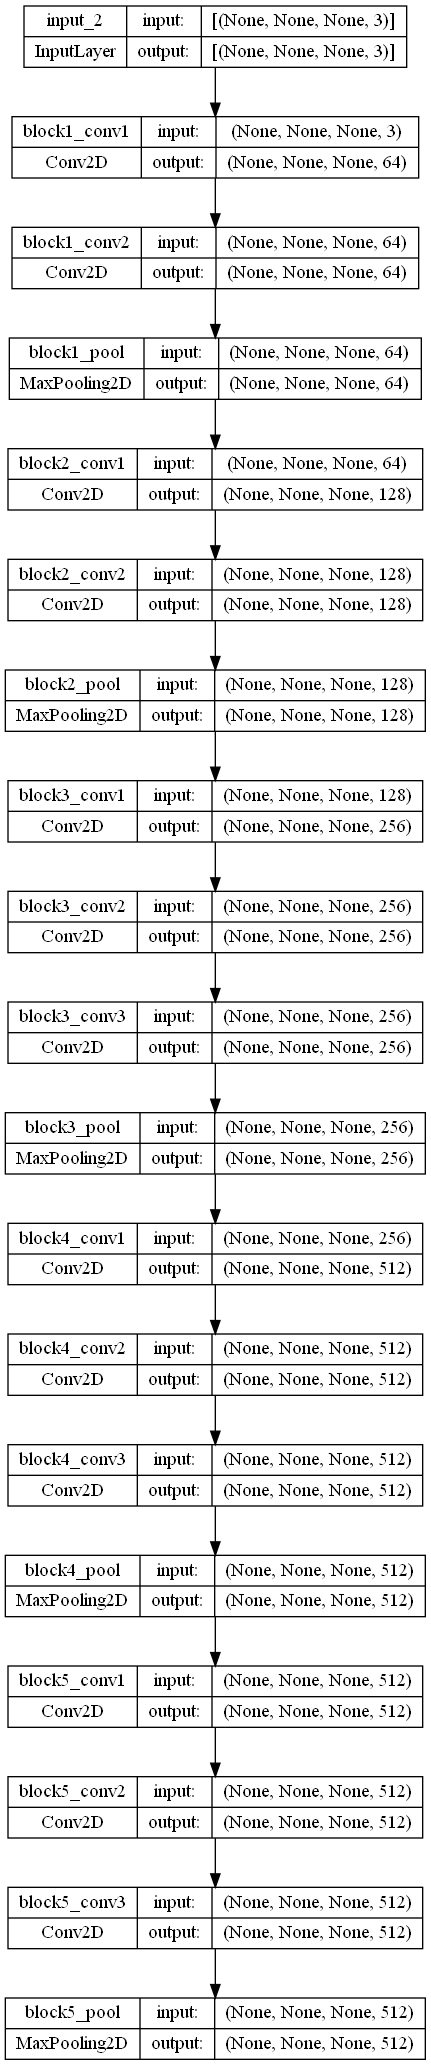

In [27]:
model_resnet50_vgg16 = vgg16.VGG16(weights='imagenet', include_top=False)
tf.keras.utils.plot_model(model_resnet50_vgg16, show_shapes=True)

In [28]:
img = image.load_img(img_test, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

features = model_resnet50_vgg16.predict(x)
features

1/1 [==============================] - 0s 212ms/step


array([[[[  0.        ,   0.        ,   0.        , ...,   0.        ,
            2.3466055 ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            8.759154  ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            2.5770571 ,   0.        ],
         ...,
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ]],

        [[  0.        ,   0.        ,   0.        , ...,   0.        ,
            1.3892993 ,   0.        ],
         [  0.        ,   0.        ,  20.236355  , ...,   0.        ,
           15.225687  ,   0.        ],
         [  0.        ,   0.        , 118.88633   , ...,   0.        ,
            9.684986  ,   3.43466

<div style="display: flex; background-color: indigo;" >

#### 3.2.3. Prédiction
</div>

In [36]:
img_test = r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).jpeg'

found, predict_class = predict_img(model=model_resnet50_vgg16,img_test=img_test, target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)

1/1 [==============================] - 0s 152ms/step


TypeError: only size-1 arrays can be converted to Python scalars

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.3. VGG19
</div>

In [30]:
from tensorflow.keras.applications import vgg19

574710816/574710816 [==============================] - 52s 0us/step


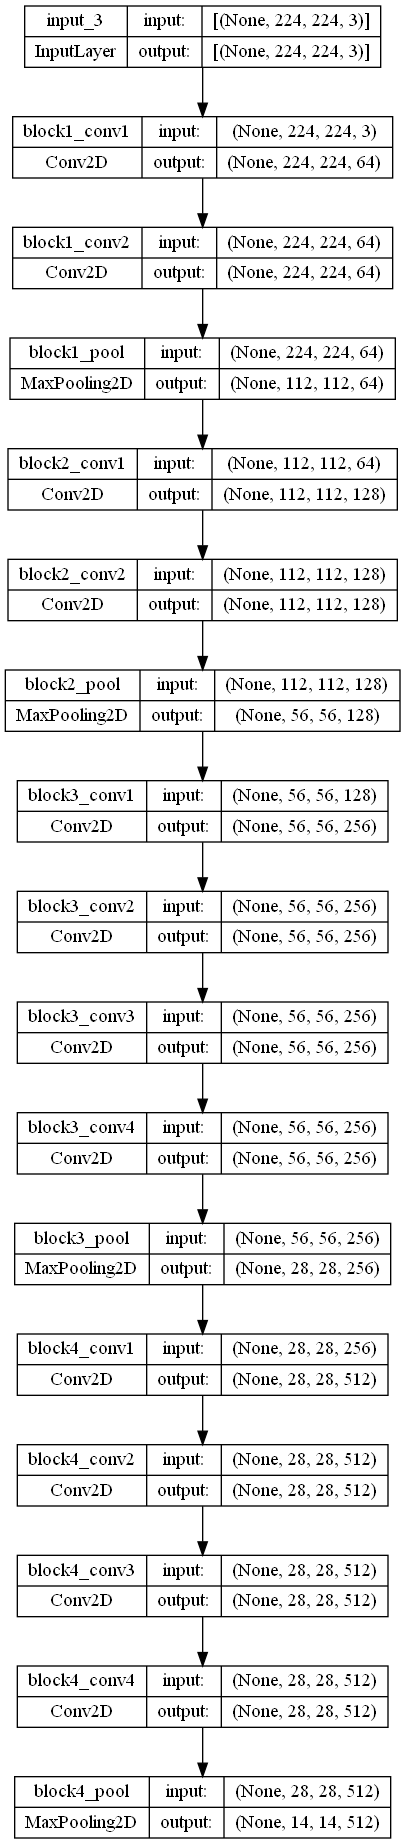

In [31]:
base_model_vgg19 = vgg19.VGG19(weights='imagenet')
model_vgg19 = Model(inputs=base_model_vgg19.input, outputs=base_model_vgg19.get_layer('block4_pool').output)
tf.keras.utils.plot_model(model_vgg19, show_shapes=True)

In [32]:
img = image.load_img(img_test, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg19.preprocess_input(x)

block4_pool_features = model_vgg19.predict(x)
block4_pool_features

1/1 [==============================] - 0s 218ms/step


array([[[[   0.       ,  571.295    ,   72.65174  , ...,    0.       ,
            32.924053 ,  170.17485  ],
         [  41.52257  ,  508.4857   ,    0.       , ...,    0.       ,
             0.       ,  264.73953  ],
         [   0.       ,  273.62357  ,    0.       , ...,    0.       ,
            92.40267  ,  368.06125  ],
         ...,
         [   0.       ,    0.       ,    0.       , ...,    0.       ,
             0.       ,  273.78775  ],
         [   0.       ,    0.       ,    0.       , ...,    0.       ,
             0.       ,  228.52382  ],
         [ 178.01553  ,    4.2667384,  395.21814  , ...,    0.       ,
             0.       ,  154.26277  ]],

        [[   0.       ,  382.34967  ,  953.2164   , ...,   63.048878 ,
             0.       ,    0.       ],
         [   0.       ,   53.672028 ,  328.30984  , ...,  120.55957  ,
             0.       ,    0.       ],
         [   0.       ,    0.       ,  638.85693  , ...,    0.       ,
             0.       ,   25.2116

<div style="display: flex; background-color: indigo;" >

#### 3.3.3. Prédiction
</div>

In [ ]:
img_test = r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).jpeg'

found, predict_class = predict_img(model=model_vgg19,img_test=img_test, target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.4. InceptionV3
</div>

Fine-tune InceptionV3 on a new set of classes

In [33]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD

<div style="display: flex; background-color: indigo;" >

#### 3.4.1. Création du modèle
</div>

In [34]:
# create the base pre-trained model
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model_inceptionv3.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(units=1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
# predictions = Dense(units=200, activation='softmax')(x)
predictions = Dense(units=1,activation='sigmoid')(x)

# this is the model we will train
model_inceptionv3 = Model(inputs=base_model_inceptionv3.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model_inceptionv3.layers:
    layer.trainable = False

model_inceptionv3.summary()

87910968/87910968 [==============================] - 8s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_2 (Conv2D)              (None, None, None,   864         ['input_4[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d_2[0][0]']               
 alization)                

In [38]:
tf.keras.utils.plot_model(model_inceptionv3, show_shapes=True)

<div style="display: flex; background-color: indigo;" >

#### 3.4.2. Compilation et entrainement
</div>

In [39]:
# compile the model (should be done *after* setting layers to non-trainable)
# model_inceptionv3.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model_inceptionv3.compile(optimizer ='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [40]:
# train the model on the new data for a few epochs
history_inceptionv3 = model_inceptionv3.fit(training_set, epochs = epochs , validation_data=validation_set)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers we should freeze:
for i, layer in enumerate(base_model_inceptionv3.layers):
   print(i, layer.name)

Epoch 1/50
800/800 [==============================] - 83s 100ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/50
800/800 [==============================] - 74s 92ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/50
800/800 [==============================] - 71s 88ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/50
800/800 [==============================] - 71s 89ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/50
800/800 [==============================] - 70s 88ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/50
800/800 [==============================] - 70s 87ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/50
800/800 [==============================] - 70s 87ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000
Epoch 8/50
800/800 [=============

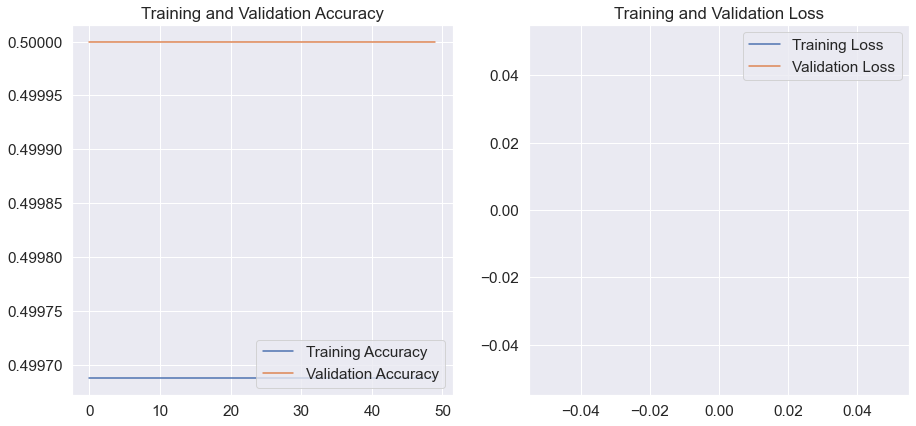

In [41]:
show_learning_graph(history=history_inceptionv3, epochs=epochs, verbose=0)

In [ ]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model_inceptionv3.layers[:249]:
   layer.trainable = False
for layer in model_inceptionv3.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate

# model_inceptionv3.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')
model_inceptionv3.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_inceptionv3_update = model_inceptionv3.fit(training_set, epochs = epochs , validation_data=validation_set)

In [ ]:
show_learning_graph(history=history_inceptionv3_update, epochs=epochs, verbose=0)

<div style="display: flex; background-color: indigo;" >

#### 3.4.3. Prédiction
</div>

In [ ]:
img_test = r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).jpeg'

found, predict_class = predict_img(model=model_inceptionv3,img_test=img_test, target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)

In [ ]:
aurelie_test, aurelie_y = get_aurelie_test()
df_cm, fail_files = predict_n_img(model_inceptionv3, aurelie_test, aurelie_y,target_size, labels, verbose=verbose)

In [ ]:
aurelie_test, aurelie_y = get_aurelie_full_test(label_codes=training_set.class_indices)
df_cm, fail_files = predict_n_img(model_inceptionv3, aurelie_test, aurelie_y,target_size, labels, verbose=verbose)